In [22]:
#importing pandas library for big data analysis

import pandas as pd

In [23]:
#create a dataframs and read dataset

df = pd.read_csv('MSFT.csv')


In [24]:
#display the data

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063504,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9535,2024-01-12,385.489990,388.679993,384.649994,388.470001,388.470001,21645700
9536,2024-01-16,393.660004,394.029999,387.619995,390.269989,390.269989,27202300
9537,2024-01-17,387.980011,390.109985,384.809998,389.470001,389.470001,22234100
9538,2024-01-18,391.720001,393.989990,390.119995,393.869995,393.869995,23392100


In [25]:
 #considering only two columns "Date" and "Close" for simplification purpose and discarding others

df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989
9537,2024-01-17,389.470001
9538,2024-01-18,393.869995


In [26]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9535    2024-01-12
9536    2024-01-16
9537    2024-01-17
9538    2024-01-18
9539    2024-01-19
Name: Date, Length: 9540, dtype: object

In [27]:
#here first datetime module is used to change the dtype "object" to "integer arrays"
#creating a function "str_to_datetime" which takes a input 's' and splits it using a hyphen '-'
#further converting the split to integer.
#creating a 'datetime_object' and applying the function to a particular date from the data

import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [28]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989
9537,2024-01-17,389.470001
9538,2024-01-18,393.869995


In [29]:
#Applying the 'str_to_datetime' function to all dates

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-29-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9535   2024-01-12
9536   2024-01-16
9537   2024-01-17
9538   2024-01-18
9539   2024-01-19
Name: Date, Length: 9540, dtype: datetime64[ns]

In [31]:
df

#here the first column is integer. we want to make the 'Date' column the first column

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9535,2024-01-12,388.470001
9536,2024-01-16,390.269989
9537,2024-01-17,389.470001
9538,2024-01-18,393.869995


In [32]:
#we made the 'Date' column the first column

df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-01-12,388.470001
2024-01-16,390.269989
2024-01-17,389.470001


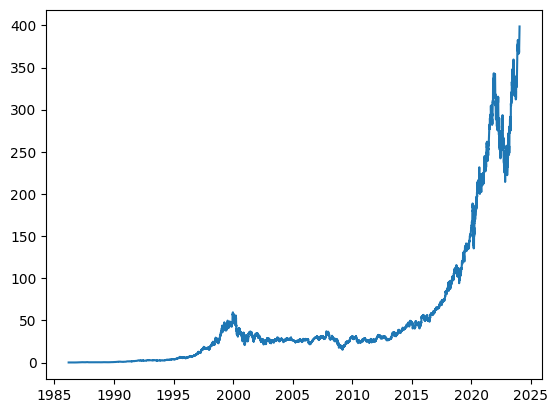

In [33]:
#Here we are plotting the "Date" and 'Close' using 'Matplotlib'

import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [59]:
 #As we wil be using LSTM so we have to convert this into a supervised learning problem

import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2023-01-23'
windowed_df = df_to_windowed_df(df,
                                '2023 -01-23',
                                '2024-01-19',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-23,235.809998,231.929993,240.220001,242.580002
1,2023-01-24,231.929993,240.220001,242.580002,242.039993
2,2023-01-25,240.220001,242.580002,242.039993,240.610001
3,2023-01-26,242.580002,242.039993,240.610001,248.000000
4,2023-01-27,242.039993,240.610001,248.000000,248.160004
...,...,...,...,...,...
245,2024-01-12,375.790009,382.769989,384.630005,388.470001
246,2024-01-16,382.769989,384.630005,388.470001,390.269989
247,2024-01-17,384.630005,388.470001,390.269989,389.470001
248,2024-01-18,388.470001,390.269989,389.470001,393.869995


In [60]:
#The code converts a windowed pandas DataFrame ("windowed_dataframe") into three arrays: "dates" (extracted from the first column),
#"X" (input features, excluding the first and last columns), and "y" (target values, extracted from the last column).
#The shapes of the resulting arrays ("dates", "X", and "y") are then printed.

def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

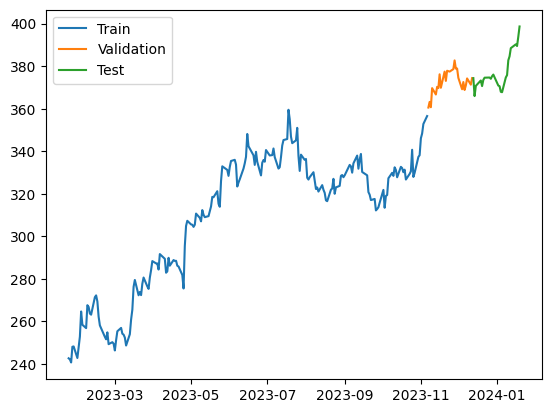

In [62]:
#Splitting the data into 'Training', 'Validation', 'Testing'

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
#Creating and Training model

In [63]:
#using LSTM(64) so that the nuerons are not too large and small
#setting the activation function of "Dense" to 'relu' and "not changing the activation for LSTM"
#using "loss='mse'" and using "Adam optimizer" by setting the "learning reate to 0.001" which can be changed for different purposes
#using "mean_absolute _error metrics"

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 87ms/step - loss: 96003.7891 - mean_absolute_error: 308.2346 - val_loss: 138254.1875 - val_mean_absolute_error: 371.7833
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 95600.9609 - mean_absolute_error: 307.5780 - val_loss: 137788.4219 - val_mean_absolute_error: 371.1564
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 95265.1875 - mean_absolute_error: 307.0331 - val_loss: 137436.5781 - val_mean_absolute_error: 370.6821
Epoch 4/100
7/7 [==============================] - 0s 72ms/step - loss: 94908.6094 - mean_absolute_error: 306.4486 - val_loss: 136811.2031 - val_mean_absolute_error: 369.8376
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 94250.9688 - mean_absolute_error: 305.3769 - val_loss: 135862.1250 - val_mean_absolute_error: 368.5523
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 93460.9297 - mean_absolute_error: 304.0787 - val_loss:

7/7 [==============================] - 0s 3ms/step


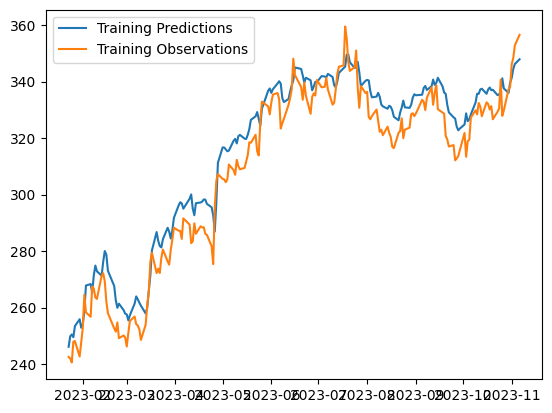

In [64]:
#training set prediction representation

train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


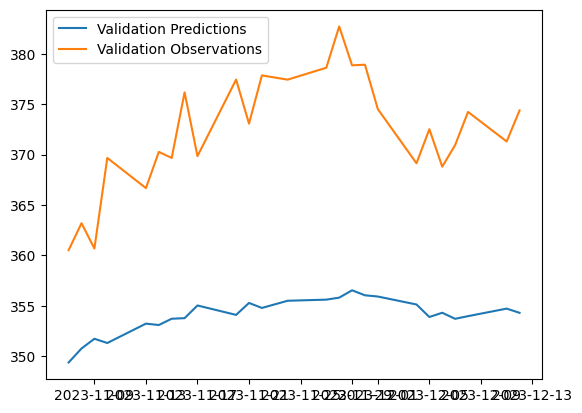

In [65]:
#validation  set prediction representation

val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 20ms/step


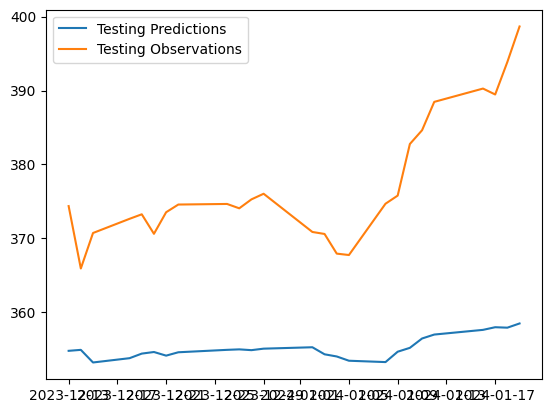

In [66]:
#for test

test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

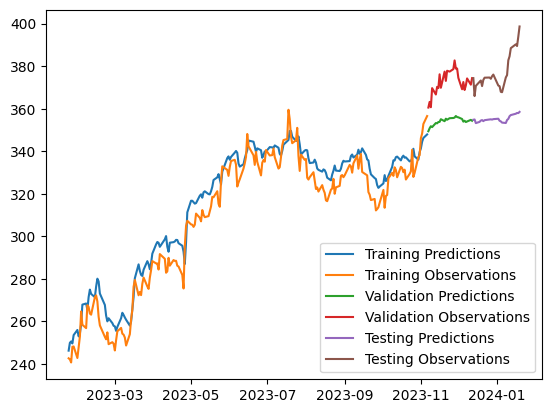

In [67]:
#displaying the above 3 grpahs as one

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
#observatins for above graph

#we observe here that these LSTM models are very bad at extrapolating(learn data outside it's range)
#if data is trained in a limited range then it's not going to be good at predicting values

In [ ]:
#now to let the model recursively predit the future

In [68]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 30ms/step


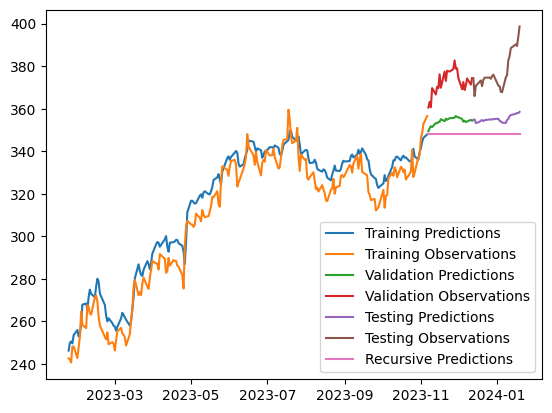

In [69]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

#the pink line at about 350 tells us that the model has no idea what will ahppen further

In [70]:
#the model made here is not useless.
#it's just a small scale model that is made conidering 2 columns which are "Date" and "Close"